In [94]:
import numpy as np
import matplotlib.pyplot as plt
import math
import pandas as pd

df = pd.read_csv(r"D:\Modules_UCD\COMP47490\Filer fra Vivek\pulsar_star_22209345.csv")

df.describe()


,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
count,10000.000000,10000.000000,8623.000000,10000.000000,10000.000000,9066.000000,10000.000000,9491.000000,10000.000000
mean,111.152580,46.565450,0.470002,1.736413,12.575519,26.392115,8.347610,105.563634,0.093000
std,25.544034,6.792943,1.043900,6.068915,29.370149,19.669786,4.541781,107.651111,0.290447
min,5.812500,25.695250,-1.738021,-1.791886,0.213211,7.370432,-3.139270,-1.976976,0.000000
25%,100.937500,42.386554,0.023313,-0.188132,1.904682,14.398657,5.795047,34.988726,0.000000
50%,115.292969,46.995270,0.223400,0.200447,2.785953,18.419994,8.467912,83.199805,0.000000
75%,127.156250,50.983623,0.473474,0.925512,5.433737,28.432991,10.731775,139.972795,0.000000
max,185.257812,91.808628,8.069522,68.101622,222.421405,110.642211,34.539844,1191.000837,1.000000


We are investigating the missing values, irregular cardinality and outliers. The missing values and cardinality are found in the next line. 

In [95]:
df.isnull().sum()

 Mean of the integrated profile                     0
 Standard deviation of the integrated profile       0
 Excess kurtosis of the integrated profile       1377
 Skewness of the integrated profile                 0
 Mean of the DM-SNR curve                           0
 Standard deviation of the DM-SNR curve           934
 Excess kurtosis of the DM-SNR curve                0
 Skewness of the DM-SNR curve                     509
target_class                                        0
dtype: int64

With 10 000 counts, we have that the missing values in "Excess kurtosis of the integrated profile" is 13.77 percent, while for the "Standard deviation of the DM-SNR curve" is 9.34 percent and "Skewness of the DM-SNR curve" is at 5.09 percent. 

In [96]:
df.nunique()

 Mean of the integrated profile                   6308
 Standard deviation of the integrated profile     9987
 Excess kurtosis of the integrated profile        8623
 Skewness of the integrated profile              10000
 Mean of the DM-SNR curve                         6256
 Standard deviation of the DM-SNR curve           9064
 Excess kurtosis of the DM-SNR curve              9998
 Skewness of the DM-SNR curve                     9489
target_class                                         2
dtype: int64

Cardinality for "Mean of the integrated profile" and "Mean of the DM-SNR curve" is much lower than the cardinality of the other variables. It must be added that the cardinality for a continuous feature should be close to the number of instances in the dataset (here given as 10 000). If the cardinality of a continuous feature is significantly less than the the number of instances in the dataset, then it should be investigated. 

When it comes to outlier values, we see that the kurtosis of the integrated profile is way under 3 (normal distribution), while the one for DM-SNR is much higher given at over 8. This suggests that there will be more extreme values on the DM-SNR curve. 

Furthermore it is seen on target value that the mean is above 0 suggesting that the probability of a pulsar being real is there. If it had been 0 for mean, then there would be a false pulsar. While 1 would indicate a real pulsar. 

For the missing values, several methods were considered. It is suggested in literature that features where 60 percent or above with missing values should/could be deleted. This is not the case for our dataset, not for any of the variables. Imputation was also considered, but is not recommended due to the high amount of missing values. Finally, an extrapolation of the missing values as done with the Lagrange method was also considered, but because the values are experimental, it could lead to biased values or results not intended. It is therefore better to work with the values one has even if they might be fewer than expected.

Task 2: We are asked to either normalize or standardize as the features as we see fit. Normalization is sensitive to outlier data, while standardization is less sensitive. By reading the tables, it can be seen that DM-SNR curves have very high max values compared to min, first and third quartile as well as median. This proves that the phenomenon of outlier values is present. Likewise, it is seen on the integrated profile curves that there is a min value problem. 

Based on the above I would standardize the curves in order to make the dataset less sensitive to outlier values. 

Task 3: We intend to build a simple classifier that will predict whether a signal comes from a pulsar or not. The evaluation measure should therefore be based on the null hypothesis: the signal is from a pulsar. We measure this by using the "target_class" column. If the value is 0, then the signal is not from a pulsar. And if the value is 1, the signal is from a pulsar. The accuracy of the dataset (whether the signal is from a pulsar or not) can be evaluated by a classifier accuracy where we find both the missclassification rate and accuracy through the formulas incorrect predictions/total predictions and correct predictions/total predictions respectively. 

We will use a confusion matrix to summarize the performance of the evalution classifier. 

Task 4: We are asked to compare a decision tree classifier, a kNN classifier and four SVM classifiers. The four SVM classifiers are: linear, poly, rbf and sigmoid kernels. 

In [100]:
X = df.drop('target_class',axis=1)
y = df['target_class']

In [101]:
df = df.dropna(how='any',axis=0)


In [102]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

ss = StandardScaler()

X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)


In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7406 entries, 1 to 9999
Data columns (total 9 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0    Mean of the integrated profile                7406 non-null   float64
 1    Standard deviation of the integrated profile  7406 non-null   float64
 2    Excess kurtosis of the integrated profile     7406 non-null   float64
 3    Skewness of the integrated profile            7406 non-null   float64
 4    Mean of the DM-SNR curve                      7406 non-null   float64
 5    Standard deviation of the DM-SNR curve        7406 non-null   float64
 6    Excess kurtosis of the DM-SNR curve           7406 non-null   float64
 7    Skewness of the DM-SNR curve                  7406 non-null   float64
 8   target_class                                   7406 non-null   float64
dtypes: float64(9)
memory usage: 836.6 KB


In [104]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [105]:
knnclassifier=KNeighborsClassifier()
SVMlinear=SVC(kernel='linear', random_state = 0)
SVMpoly=SVC(kernel='poly', random_state=0)
SVMrbf=SVC(kernel='rbf', random_state=0)
SVMsigmoid=SVC(kernel='sigmoid', random_state=0)
decisiontree = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)

In [106]:
knnclassifier.fit(X_train,y_train)
SVMlinear.fit(X_train,y_train)
SVMpoly.fit(X_train,y_train)
SVMrbf.fit(X_train,y_train)
SVMsigmoid.fit(X_train,y_train)
decisiontree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

We use the model.predict(X_test) method to predict and later compare training results. 

In [107]:
knn_pred = knnclassifier.predict(X_test)
SVMlinear_pred = SVMlinear.predict(X_test)
SVMpoly_pred = SVMpoly.predict(X_test)
SVMrbf_pred = SVMrbf.predict(X_test)
SVMsigmoid_pred = SVMsigmoid.predict(X_test)
decisiontree_pred = decisiontree.predict(X_test)

In Python, the accuracy_score function of the sklearn. metrics package calculates the accuracy score for a set of predicted labels against the true labels. So, we use the function to define the accuracy of the training versus prediction of test.

In [108]:
from sklearn.metrics import accuracy_score


In [109]:
Accuracy_of_knn = accuracy_score(y_test, knn_pred)
print(Accuracy_of_knn)

0.9783978397839784


In [110]:
Accuracy_of_SVMlinear = accuracy_score(y_test, SVMlinear_pred)
print(Accuracy_of_SVMlinear)

0.9792979297929792


In [111]:
Accuracy_of_SVMpoly = accuracy_score(y_test, SVMpoly_pred)
print(Accuracy_of_SVMpoly)

0.9770477047704771


In [112]:
Accuracy_of_SVMrbf = accuracy_score(y_test, SVMrbf_pred)
print(Accuracy_of_SVMrbf)

0.9792979297929792


In [113]:
Accuracy_of_SVMsigmoid = accuracy_score(y_test, SVMsigmoid_pred)
print(Accuracy_of_SVMsigmoid)

0.873087308730873


In [114]:
Accuracy_of_decisiontree = accuracy_score(y_test, decisiontree_pred)
print(Accuracy_of_decisiontree)

0.9626462646264626


To compare these 6 accuracy values obtained, we make a table for better overview. 

In [115]:
from tabulate import tabulate
Accuracy = [
    ['knn', 'SVMlinear', 'SVMpoly', 'SVMrbf', 'SVMsigmoid', 'decisiontree'],
        [0.9783978397839784, 0.9792979297929792, 0.9770477047704771, 0.9792979297929792, 0.873087308730873, 0.9626462646264626 ]
]
print(tabulate(Accuracy))

------------------  ------------------  ------------------  ------------------  -----------------  ------------------
knn                 SVMlinear           SVMpoly             SVMrbf              SVMsigmoid         decisiontree
0.9783978397839784  0.9792979297929792  0.9770477047704771  0.9792979297929792  0.873087308730873  0.9626462646264626
------------------  ------------------  ------------------  ------------------  -----------------  ------------------


From the table we see that SVMlinear and SVMrbf have the highest accuracy, while SVMsigmoid has the lowest accuracy. The rbf has a gaussian distribution and it is a bit surprising that it has the same accuracy as the linear. But we know it is pulsar we are looking for, so that could be the reason for why linear and normal distribution has high accuracy. It is not surprising to see that the sigmoid has a lower accuracy as it has a different shape and lacks relevance for pulsar detection. 

Task 5: We are asked to use a filter technique to identify the three most discriminative and three least discrimantive features in the dataset. For this task a filter method known as Correlation coefficient based on Pearson coefficient was used. The logic is that features should correlate highly with the target and at the same time correlate weakly between themselves. Literature often uses a P = 0.5 as a treshold for defining weak and strongly. P can vary between - 1 and 1. For a discriminative feature it is so that discriminative machine learning maximizes the conditional probability P. 

We use a correlation matrix to evaluate the correlation between the features. 

<Axes: >

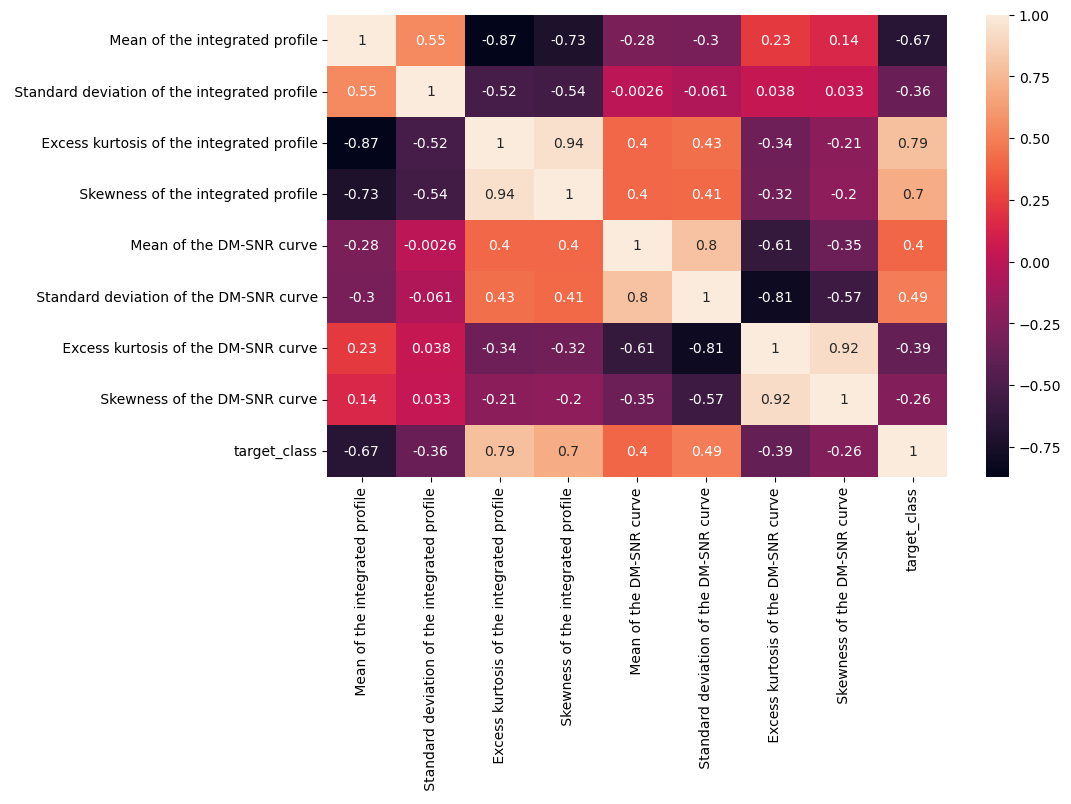

In [116]:
import seaborn as sns

cor = df.corr()
plt.figure(figsize = (10,6))
sns.heatmap(cor, annot = True)

Based on the correlation matrix the most discriminative features are: "Excess kurtosis of the integrated profile", "Skewness of the integrated profile" and "Mean of the integrated profile". The least discriminative features are: "Skewness of the DM-SNR curve", "Standard deviation of the integrated profile" and "Excess kurtosis of the DM-SNR curve". 

In [185]:
df = pd.read_csv(r"D:\Modules_UCD\COMP47490\Filer fra Vivek\pulsar_star_22209345.csv")

df2 = df.drop(df.columns[[4, 5]],axis = 1)

In [186]:
df2=df2.dropna(how='any',axis=0)

In [187]:
X = df2.drop('target_class',axis=1)
y = df2['target_class']

In [192]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

ss = StandardScaler()

X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

In [193]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8188 entries, 1 to 9999
Data columns (total 7 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0    Mean of the integrated profile                8188 non-null   float64
 1    Standard deviation of the integrated profile  8188 non-null   float64
 2    Excess kurtosis of the integrated profile     8188 non-null   float64
 3    Skewness of the integrated profile            8188 non-null   float64
 4    Excess kurtosis of the DM-SNR curve           8188 non-null   float64
 5    Skewness of the DM-SNR curve                  8188 non-null   float64
 6   target_class                                   8188 non-null   float64
dtypes: float64(7)
memory usage: 511.8 KB


In [194]:
SVMlinear.fit(X_train,y_train)
SVMpoly.fit(X_train,y_train)
SVMrbf.fit(X_train,y_train)
SVMsigmoid.fit(X_train,y_train)

SVC(kernel='sigmoid', random_state=0)

In [199]:
SVMlinear_pred = SVMlinear.predict(X_test)
SVMpoly_pred = SVMpoly.predict(X_test)
SVMrbf_pred = SVMrbf.predict(X_test)
SVMsigmoid_pred = SVMsigmoid.predict(X_test)

In [200]:
Accuracy_of_SVMlinear = accuracy_score(y_test, SVMlinear_pred)
print(Accuracy_of_SVMlinear)
Accuracy_of_SVMpoly = accuracy_score(y_test, SVMpoly_pred)
print(Accuracy_of_SVMpoly)
Accuracy_of_SVMrbf = accuracy_score(y_test, SVMrbf_pred)
print(Accuracy_of_SVMrbf)
Accuracy_of_SVMsigmoid = accuracy_score(y_test, SVMsigmoid_pred)
print(Accuracy_of_SVMsigmoid)


0.975986975986976
0.9731379731379731
0.9768009768009768
0.8722018722018722


We compare the values with the ones we got for the other set: 0.9792979297929792  0.9770477047704771  0.9792979297929792  0.87308730873087. And can see a small uptick in accuracy for all. 

Task 6: The task asks us to carefully identify the most discriminating features to predict the binary outcome of the dataset using one wrapper feature technique. We find the feature with the smallest p-value in correlation and use forward selection to analyze. 

In [280]:
df = pd.read_csv(r"D:\Modules_UCD\COMP47490\Filer fra Vivek\pulsar_star_22209345.csv")

df3=df.dropna(how='any',axis=0)

In [281]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7406 entries, 1 to 9999
Data columns (total 9 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0    Mean of the integrated profile                7406 non-null   float64
 1    Standard deviation of the integrated profile  7406 non-null   float64
 2    Excess kurtosis of the integrated profile     7406 non-null   float64
 3    Skewness of the integrated profile            7406 non-null   float64
 4    Mean of the DM-SNR curve                      7406 non-null   float64
 5    Standard deviation of the DM-SNR curve        7406 non-null   float64
 6    Excess kurtosis of the DM-SNR curve           7406 non-null   float64
 7    Skewness of the DM-SNR curve                  7406 non-null   float64
 8   target_class                                   7406 non-null   float64
dtypes: float64(9)
memory usage: 578.6 KB


In [282]:
X = df3.drop('target_class', axis=1)
y = df3['target_class']

In [283]:
!pip install mlxtend

In [284]:
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.linear_model import LinearRegression

In [285]:
lreg = LinearRegression()
sfs1 = sfs(lreg, k_features=6, forward=True, verbose=2, scoring='neg_mean_squared_error')

In [286]:
sfs1 = sfs1.fit(X, y)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s finished

[2023-10-28 00:43:17] Features: 1/6 -- score: -0.03200571366372192[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished

[2023-10-28 00:43:17] Features: 2/6 -- score: -0.029640111479561713[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s finished

[2023-10-28 00:43:17] Features: 3/6 -- score: -0.02831815210243984[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Do

In [287]:
features = list(sfs1.k_feature_names_)
print(features)


[' Mean of the integrated profile', ' Standard deviation of the integrated profile', ' Excess kurtosis of the integrated profile', ' Skewness of the integrated profile', ' Mean of the DM-SNR curve', ' Standard deviation of the DM-SNR curve']


We stuck with 6 features as in the last task in order to have proper ground to compare. We will then make a new dataset from these features and use the 6 classifiers on them. 

In [375]:
df3 = df3[features]

In [376]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

ss = StandardScaler()

X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

In [377]:
knnclassifier.fit(X_train,y_train)
SVMlinear.fit(X_train,y_train)
SVMpoly.fit(X_train,y_train)
SVMrbf.fit(X_train,y_train)
SVMsigmoid.fit(X_train,y_train)
decisiontree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [378]:
knn_pred = knnclassifier.predict(X_test)
SVMlinear_pred = SVMlinear.predict(X_test)
SVMpoly_pred = SVMpoly.predict(X_test)
SVMrbf_pred = SVMrbf.predict(X_test)
SVMsigmoid_pred = SVMsigmoid.predict(X_test)
decisiontree_pred = decisiontree.predict(X_test)

In [379]:
Accuracy_of_knn = accuracy_score(y_test, knn_pred)
print(Accuracy_of_knn)
Accuracy_of_SVMlinear = accuracy_score(y_test, SVMlinear_pred)
print(Accuracy_of_SVMlinear)
Accuracy_of_SVMpoly = accuracy_score(y_test, SVMpoly_pred)
print(Accuracy_of_SVMpoly)
Accuracy_of_SVMrbf = accuracy_score(y_test, SVMrbf_pred)
print(Accuracy_of_SVMrbf)
Accuracy_of_SVMsigmoid = accuracy_score(y_test, SVMsigmoid_pred)
print(Accuracy_of_SVMsigmoid)
Accuracy_of_decisiontree = accuracy_score(y_test, decisiontree_pred)
print(Accuracy_of_decisiontree)

0.9783978397839784
0.9792979297929792
0.9770477047704771
0.9792979297929792
0.873087308730873
0.9626462646264626


The results from the filter method, for comperative reasons, are: 
0.975986975986976
0.9731379731379731
0.9768009768009768
0.8722018722018722
We see that the accuracy for the wrapping method are higher than for the filter method. This is credible I believe as the computer has a higher input. But they should nevertheless be the same, with minor differences. 

Task 7: First of all, we see that the accuracy values obtained for wrapper and original are the same, and that they show higher accuracy than the one obtained for filter. It should also be mentioned that the features used are different for the 3 methods. On the original, we used all features. While for the second and third we used 6, but there was a difference in what features that was used. For the wrapper method the first 6 features were used, while for the filter method 0 to 3 and 6 and 7 were used. The numbers denote their place in the setup and can be double-checked earlier in the assignment. 

The accuracy worsened after the use of filter method. However it improved after use of the wrapper method. The results are roughly in line with my expectations.

Task 8: We start with the one class classifier, and then proceed to the ROC curves for the various classifiers. 

In [380]:
from sklearn.svm import OneClassSVM
df = pd.read_csv(r"D:\Modules_UCD\COMP47490\Filer fra Vivek\pulsar_star_22209345.csv")

df4 = df.dropna(how='any',axis=0)

In [381]:
X = df4.drop('target_class',axis=1)
y = df4['target_class']

In [382]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7406 entries, 1 to 9999
Data columns (total 9 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0    Mean of the integrated profile                7406 non-null   float64
 1    Standard deviation of the integrated profile  7406 non-null   float64
 2    Excess kurtosis of the integrated profile     7406 non-null   float64
 3    Skewness of the integrated profile            7406 non-null   float64
 4    Mean of the DM-SNR curve                      7406 non-null   float64
 5    Standard deviation of the DM-SNR curve        7406 non-null   float64
 6    Excess kurtosis of the DM-SNR curve           7406 non-null   float64
 7    Skewness of the DM-SNR curve                  7406 non-null   float64
 8   target_class                                   7406 non-null   float64
dtypes: float64(9)
memory usage: 578.6 KB


In [383]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

ss = StandardScaler()

X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

In [384]:
oneclass = OneClassSVM(gamma='auto', nu=0.01).fit(X_train, y_train)

In [385]:
oneclass1 = oneclass.predict(X_test)

We use the built-in function for ROC in SKlearn for the rest of the task.

In [414]:
knnclassifier=KNeighborsClassifier()
SVMlinear=SVC(kernel='linear',probability=True,random_state = 0)
SVMpoly=SVC(kernel='poly', probability = True, random_state=0)
SVMrbf=SVC(kernel='rbf', probability = True, random_state=0)
SVMsigmoid=SVC(kernel='sigmoid', probability = True, random_state=0)
decisiontree = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)

In [415]:
knnclassifier.fit(X_train,y_train)
SVMlinear.fit(X_train,y_train)
SVMpoly.fit(X_train,y_train)
SVMrbf.fit(X_train,y_train)
SVMsigmoid.fit(X_train,y_train)
decisiontree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [419]:
pred_prob2 = SVMlinear.predict_proba(X_test)
pred_prob3 = SVMpoly.predict_proba(X_test)
pred_prob4 = SVMrbf.predict_proba(X_test)
pred_prob5 = SVMsigmoid.predict_proba(X_test)
pred_prob6 = decisiontree.predict_proba(X_test)
#pred_prob7 = oneclass.predict_proba(X_test)

In [422]:
from sklearn.metrics import roc_curve

fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, pred_prob2[:,1], pos_label=1)
fpr3, tpr3, thresh3 = roc_curve(y_test, pred_prob3[:,1], pos_label=1)
fpr4, tpr4, thresh4 = roc_curve(y_test, pred_prob4[:,1], pos_label=1)
fpr5, tpr5, thresh5 = roc_curve(y_test, pred_prob5[:,1], pos_label=1)
fpr6, tpr6, thresh6 = roc_curve(y_test, pred_prob6[:,1], pos_label=1)

random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

We continue on to make the Roc plot. 

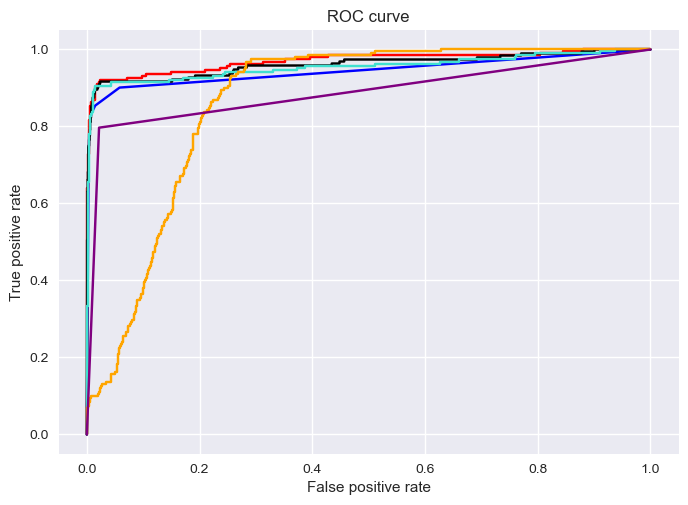

In [432]:
plt.plot(fpr1, tpr1, color = 'blue', label = 'knn')
plt.plot(fpr2, tpr2, color = 'red', label = 'SVMlinear')
plt.plot(fpr3, tpr3, color = 'black', label = 'SVMpoly')
plt.plot(fpr4, tpr4, color = 'turquoise', label = 'SVMrbf')
plt.plot(fpr5, tpr5, color = 'orange', label = 'SVMsigmoid')
plt.plot(fpr6, tpr6, color = 'purple', label = 'decisiontree')

plt.title('ROC curve')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.show()

My impression of the ROC curve is that the SVMlinear, SVMrbf and SVMblack seem to be the best ones, based on true positive rate. I think SVMsigmoid has a bad performance alongside the decisiontree classifier. kNN is the fourth best classifier according to the curve. 

We are also asked whether we are satisfied with the result. I believe I am. It seems to have gone according to the literature. 

Task 9: we investigate more thoroughly into several aspects of the assignment in this part. 

i) correlation of the various features with the target class. Here I refer to the correlation matrix made previously in the assignment. We will use the seaborn function to pairplot the features, and in particular with the target class. 

C:\Users\Furka\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


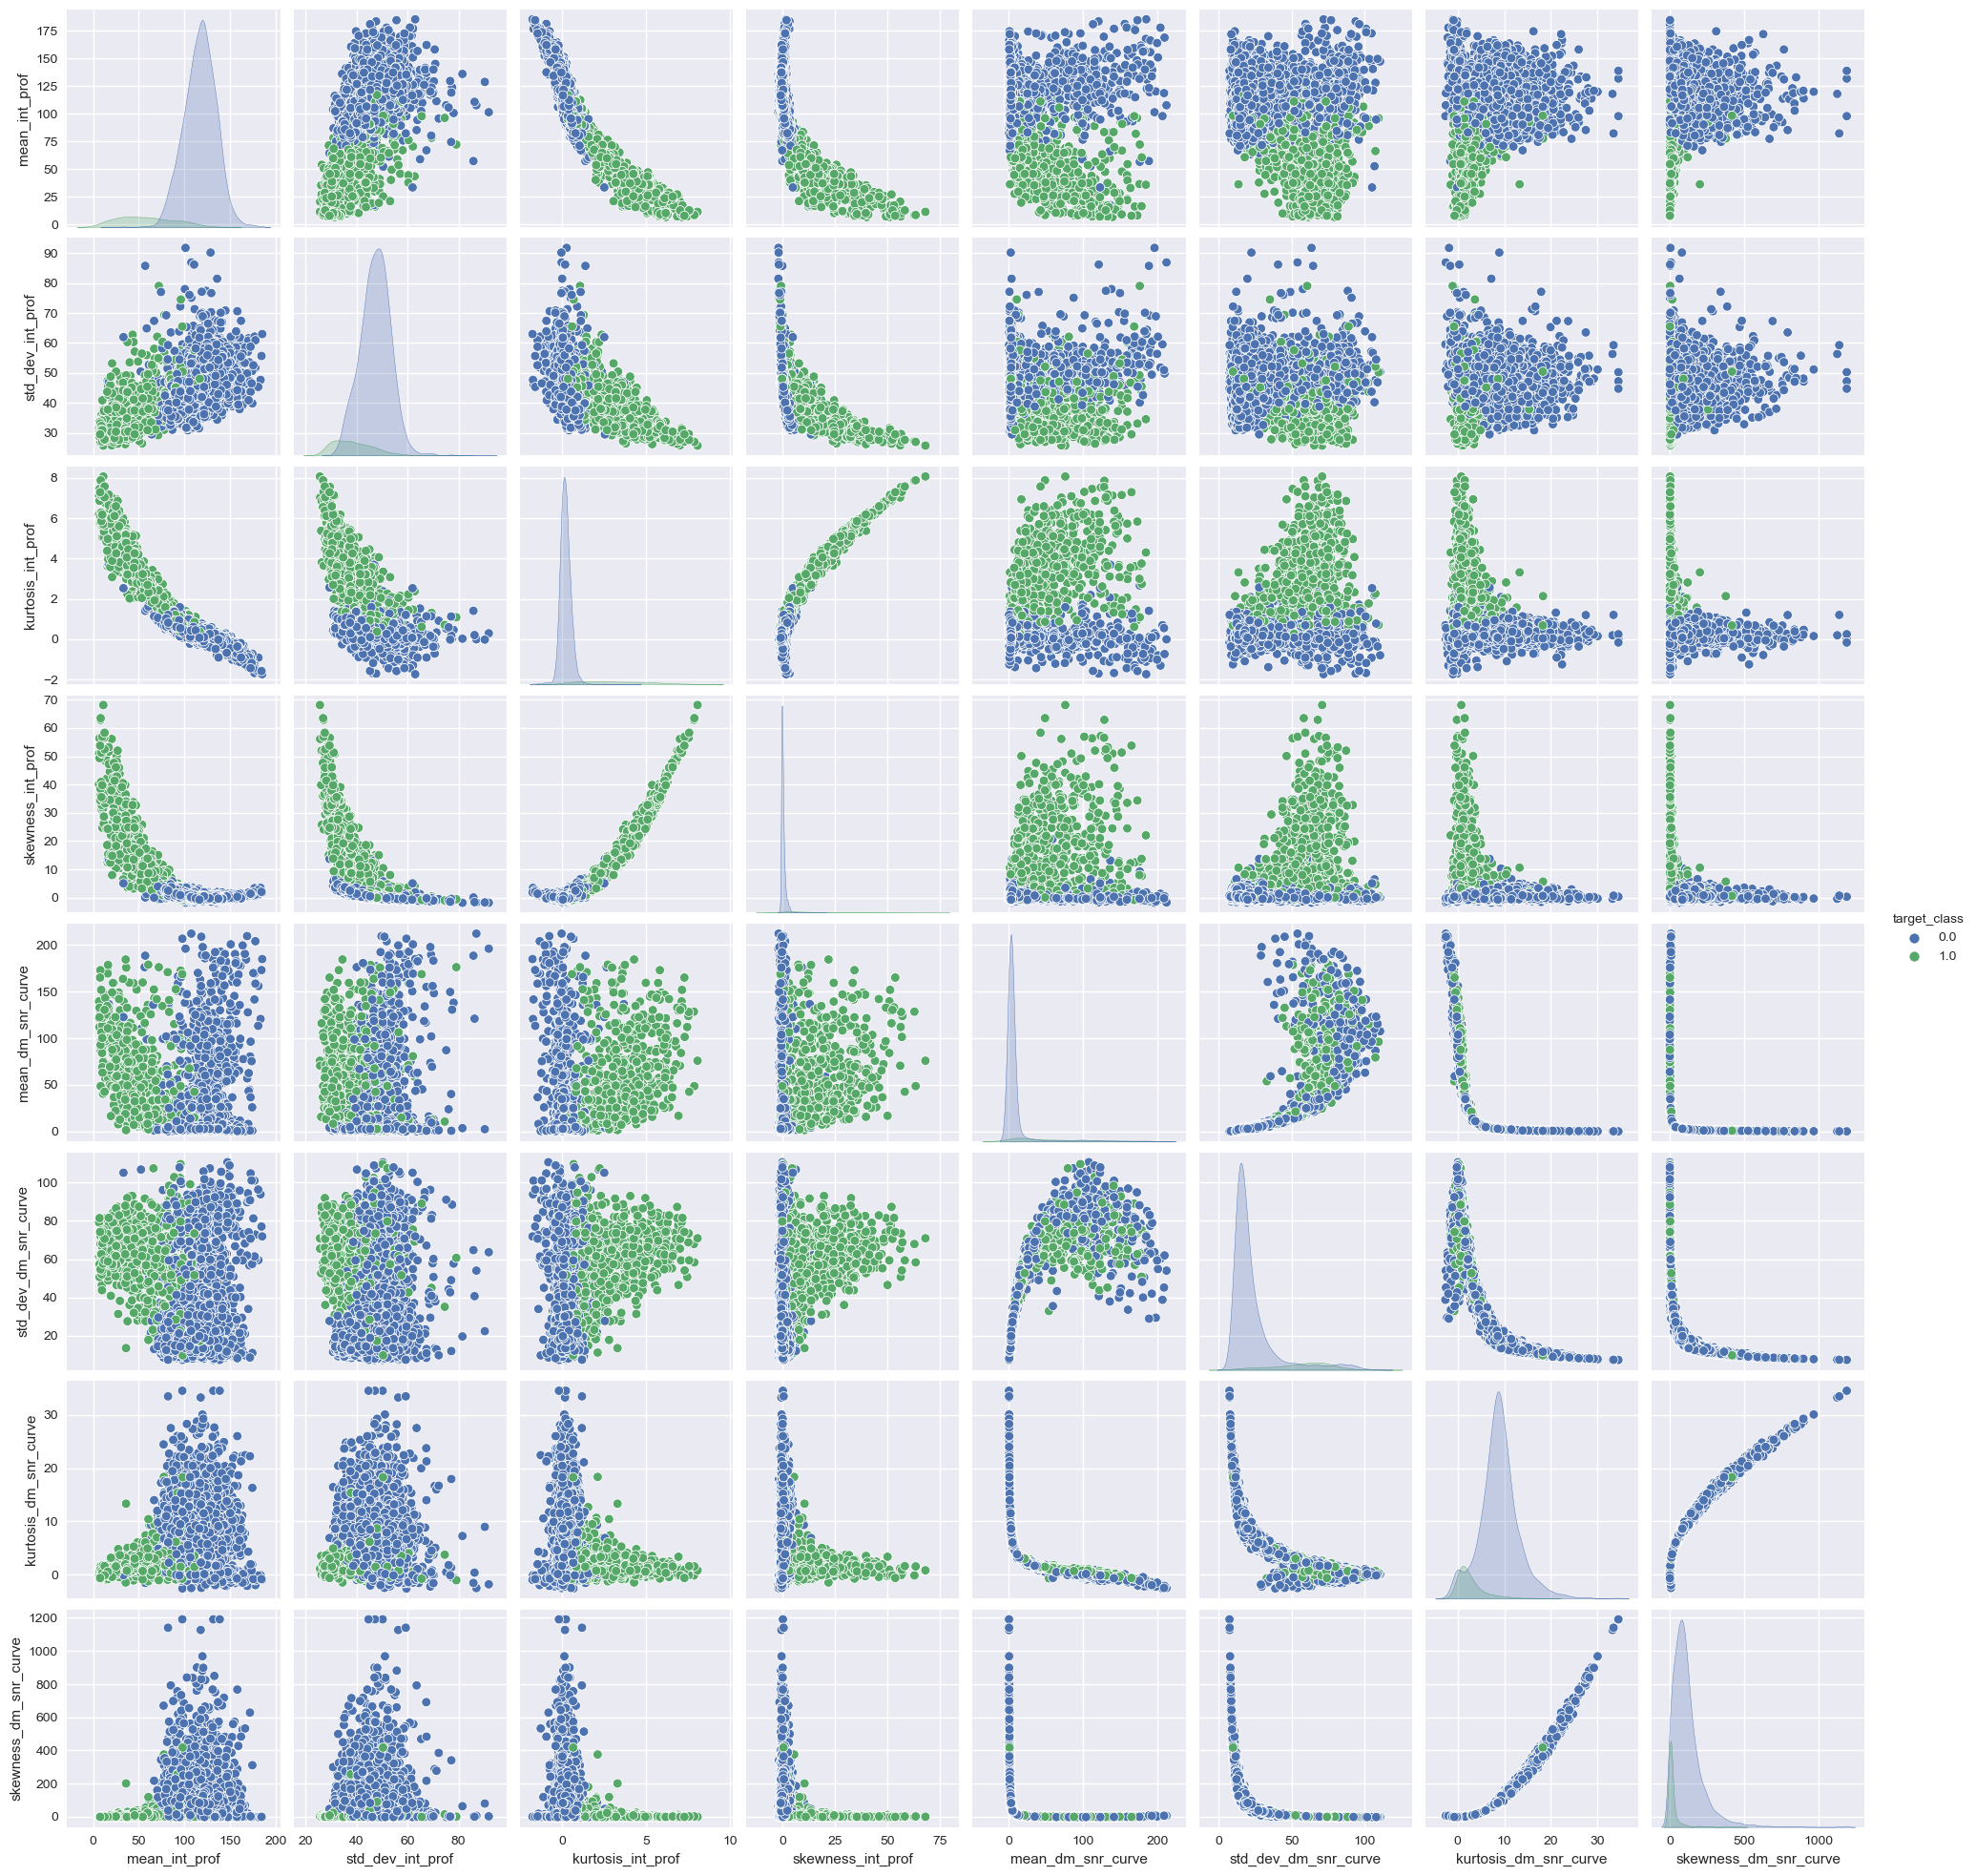

In [446]:
import seaborn as sns
df = pd.read_csv(r"D:\Modules_UCD\COMP47490\Filer fra Vivek\pulsar_star_22209345.csv")
df = df.rename(columns={' Mean of the integrated profile':"mean_int_prof",
       ' Standard deviation of the integrated profile':"std_dev_int_prof",
       ' Excess kurtosis of the integrated profile':"kurtosis_int_prof",
       ' Skewness of the integrated profile':"skewness_int_prof", 
        ' Mean of the DM-SNR curve':"mean_dm_snr_curve",
       ' Standard deviation of the DM-SNR curve':"std_dev_dm_snr_curve",
       ' Excess kurtosis of the DM-SNR curve':"kurtosis_dm_snr_curve",
       ' Skewness of the DM-SNR curve':"skewness_dm_snr_curve",
       })
df = df.dropna(how='any',axis=0)

r = sns.pairplot(df, hue ="target_class", diag_kind = "kde", kind = "scatter" )


ii) feature selection and feature importance. With regard to this, we know that if there is very strong correlation between two features, then we know that those two features will have the same impact on the dependent variable. We can therefore omit one feature in order to speed up the process (take up less Computing processing power). This leads to feature selection being very important. For our own work in this assignment, we see that there are only minor differences in accuracy if you cut number of features from 8 to 6. However, this could also be due to the size of the dataset. With much larger datasets, such a decrease in accuracy could have significant effect. 

iii) ) relative performance of different classifiers and different parameter settings w.r.t different evaluation measures. My reading of kernel literature is that RBF is the standard kernel used, and that the linear is a specialized case of the RBF often used for large databases. We see that the accuracy values of those mentioned are very similar. The poly also has good performance. This can be attributed to the correlation the features have with the target_class feature. The slopes are clearly polynomial. When it comes to the sigmoid kernel for SVM it is suggested in literature that it is a complex function and has had success in neural networks. However, at smaller and simpler databases it struggles to compete with the other kernels. 

The two last classifiers are Decision tree and knn. Decision tree supports automatic feature interaction, whereas KNN doesn't. Decision tree classifiers are faster when the datasets are larger, but in this instance the dataset is small, so the difference between them and the SVM is negligble. Knn is slower because it scans the entire dataset. 

iv) effect of different ways of imputing missing values on the final performance of different classifiers. This was not done, I instead removed the non-null values. Smaller datasets gives faster computation time, but smaller accuracy based on the results obtained in this assignment. 